In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
def seedaj():
    with open("/dev/urandom", 'rb') as f:
        return (int.from_bytes(f.read(4), 'big'))
def konc():
    import os
    duration = 0.5  # second
    freq = 880  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))


## Poenostavljen model

In [7]:
%%time
N=10**6
def enostaven(N, mu=0.5):
    N = int(N)
    sipanj = np.zeros(N)
    rji = 0
    tji = 0
    def sipaj(mu = mu):
        x = - mu * np.log(1-np.random.uniform())
        t = 0
        r = 0
        sipanj = 0
        while True:
            sign = np.random.choice([-1,1])
            s = - mu * np.log(1-np.random.uniform())
            x += sign*s
            if x>1:
                t = 1
                break
            elif x < 0:
                r = 1
                sipanj += 1
                break
            sipanj += 1
        return sipanj, t, r
    for i in range(N):
        #print(f"N je {i}", end="\r")
        s, r, t = sipaj(mu=mu)
        sipanj[i] = s
        tji += t
        rji += r
    return sipanj, tji/N, rji/N
"""s, t, r = enostaven(N)
print(f"t: {t:0.5}, r: {r:0.5}")
plt.hist(s, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], density=True)
plt.xlabel("Število sipanj ()")
plt.ylabel("relativna pogostost št. sipanj ()")
plt.xlim((0,12))
#plt.savefig("3-1-1-porazdelitev-po-stevilu-sipanj.pdf")
plt.title(r"$\mu = 0.5,\; N=5 \cdot 10^3$")
plt.show()"""

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 44.3 µs


In [3]:
"""%%time
mali = np.linspace(0.01, 2, 50)
veliki = np.linspace(2, 5, 25)
miji = np.concatenate((mali, veliki))
tji = []
rji = []
for mi in miji:
    print(mi)
    _, t, r = enostaven(100000, mu = mi)
    tji.append(t)
    rji.append(r)
plt.plot(miji, tji, label="t")
plt.plot(miji, rji, label="r")
plt.legend()
plt.title("Refleksivnost in transmisivnost")
plt.xlabel(r"$\mu$, N=$10^5$")
plt.savefig("3-2-t-r-od-mi-1e5.pdf")
plt.show()

data = pd.DataFrame(data = {"miji": miji,
                           "rji": rji,
                           "tji": tji})
data.to_csv("podatki/3-2-vpliv-mi-na-t-in-r-1e5.csv")"""

'%%time\nmali = np.linspace(0.01, 2, 50)\nveliki = np.linspace(2, 5, 25)\nmiji = np.concatenate((mali, veliki))\ntji = []\nrji = []\nfor mi in miji:\n    print(mi)\n    _, t, r = enostaven(100000, mu = mi)\n    tji.append(t)\n    rji.append(r)\nplt.plot(miji, tji, label="t")\nplt.plot(miji, rji, label="r")\nplt.legend()\nplt.title("Refleksivnost in transmisivnost")\nplt.xlabel(r"$\\mu$, N=$10^5$")\nplt.savefig("3-2-t-r-od-mi-1e5.pdf")\nplt.show()\n\ndata = pd.DataFrame(data = {"miji": miji,\n                           "rji": rji,\n                           "tji": tji})\ndata.to_csv("podatki/3-2-vpliv-mi-na-t-in-r-1e5.csv")'

In [6]:
%%time
def izotropen(N, mu=0.5):
    N = int(N)
    sipanj = np.zeros(N)
    rji = 0
    tji = 0
    def sipaj(mu = mu):
        x = - mu * np.log(1-np.random.uniform())
        t = 0
        r = 0
        sipanj = 0
        while True:
            smer = np.random.uniform(-1,1)
            s = - mu * np.log(1-np.random.uniform())
            x += smer*s
            if x>1:
                t = 1
                break
            elif x < 0:
                r = 1
                sipanj += 1
                break
            sipanj += 1
        return sipanj, t, r
    for i in range(N):
        #print(f"N je {i}",end="   ")
        s, r, t = sipaj(mu=mu)
        sipanj[i] = s
        tji += t
        rji += r
    return sipanj, tji/N, rji/N
"""s, t, r = izotropen(10**5)
print(f"t: {t:0.5}, r: {r:0.5}")
plt.hist(s, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], density=True, color="xkcd:azure")
plt.xlabel("Število sipanj ()")
plt.ylabel("relativna pogostost št. sipanj ()")
plt.xlim((0,12))
plt.savefig("3-3-1-IZOTROPNO-porazdelitev-po-stevilu-sipanj.pdf")
plt.title(r"$\mu = 0.5,\; N=10^5$")
plt.show()"""

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 23.1 µs


In [5]:
(0.82949/(0.82949+2), 2.0/(0.82949+2))

(0.2931588378117611, 0.7068411621882389)

IntProgress(value=0, max=220)

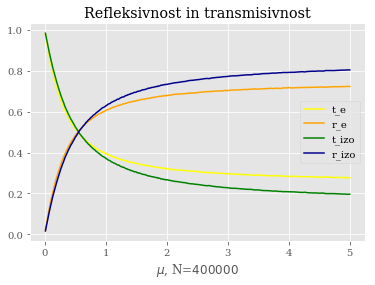

CPU times: user 5h 36min 55s, sys: 1min 46s, total: 5h 38min 41s
Wall time: 5h 57min 11s


In [9]:
%%time
from ipywidgets import IntProgress
from IPython.display import display



N = 400*10**3


mali = np.linspace(0.01, 2, 150)
veliki = np.linspace(2, 5, 70)
miji = np.concatenate((mali, veliki))

t_eno = []
r_eno = []
t_izo = []
r_izo = []
max_count=len(miji)
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

for mi in miji:
    f.value += 1
    print(f"mi = {mi:0.4} od 5", end="\r")
    _, t, r = enostaven(N, mu = mi)
    t_eno.append(t)
    r_eno.append(r)
    _, t, r = izotropen(N, mu = mi)
    t_izo.append(t)
    r_izo.append(r)
plt.plot(miji, t_eno, label="t_e",c="yellow")
plt.plot(miji, r_eno, label="r_e",c="orange")
plt.plot(miji, t_izo, label="t_izo", c="green")
plt.plot(miji, r_izo, label="r_izo", c="darkblue")
plt.legend()
plt.title("Refleksivnost in transmisivnost")
plt.xlabel(fr"$\mu$, N=${N}$")
plt.savefig(f"3-2-t-r-od-mi-{N}.pdf")
plt.show()

data = pd.DataFrame(data = {"miji": miji,
                           "r_eno": r_eno,
                           "t_eno": t_eno,                    
                           "r_izo": r_izo,
                           "t_izo": t_izo})
data.to_csv(f"podatki/3-2-vpliv-mi-na-t-in-r-DVAMODELA-{N}-popravljeno.csv")

IntProgress(value=0, max=9)

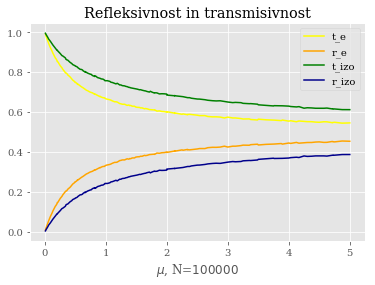

In [30]:
mali = np.linspace(0.0623, 0.908, 7)
veliki = np.linspace(2.34113, 4.721, 2)
miji = np.concatenate((mali, veliki))

t_eno = []
r_eno = []
t_izo = []
r_izo = []
max_count=len(miji)
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

for mi in miji:
    f.value += 1
    print(f"mi = {mi:0.4} od 5", end="\r")
    _, t, r = enostaven(N, mu = mi)
    t_eno.append(t)
    r_eno.append(r)
    _, t, r = izotropen(N, mu = mi)
    t_izo.append(t)
    r_izo.append(r)



data2 = pd.DataFrame(data = {"miji": miji,
                           "r_eno": r_eno,
                           "t_eno": t_eno,                    
                           "r_izo": r_izo,
                           "t_izo": t_izo})
data = pd.concat((data, data2), ignore_index=True)
data.to_csv(f"podatki/3-2-vpliv-mi-na-t-in-r-DVAMODELA-{N}.csv")

data.sort_values(by="miji", inplace=True)
plt.plot(data.miji, data.t_eno, label="t_e",c="yellow")
plt.plot(data.miji, data.r_eno, label="r_e",c="orange")
plt.plot(data.miji, data.t_izo, label="t_izo", c="green")
plt.plot(data.miji, data.r_izo, label="r_izo", c="darkblue")
plt.legend()
plt.title("Refleksivnost in transmisivnost")
plt.xlabel(fr"$\mu$, N=${N}$")
#plt.savefig(f"3-2-t-r-od-mi-{N}.pdf")
plt.show()

In [21]:
np.any(data.miji == 5.0)

True